# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

## Looking at the data

In [2]:
data = pd.read_csv('spam.csv')

In [3]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.columns = ['label', 'message']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Encoding labels

In [6]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

### Visualising the count for labels

<Axes: xlabel='label', ylabel='count'>

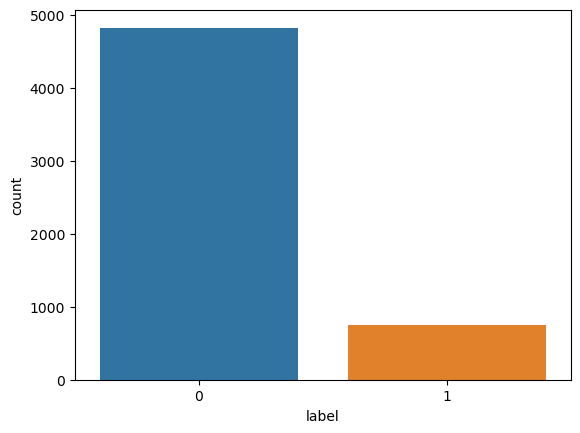

In [7]:
sns.countplot(data = data, x = 'label')

In [8]:
X = data['message']
y = data['label']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using TF-IDF
to convert the words into numerical values.

In [10]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Creating and Fitting the model

In [11]:
classifier = LogisticRegression()
try:
    classifier.fit(x_train_tfidf, y_train)
except ValueError as e:
    print("ValueError", e)

In [12]:
y_pred = classifier.predict(x_test_tfidf)

# Model's Evaluation

In [13]:
report = classification_report(y_test, y_pred, target_names = ['ham', 'spam'])
accuracy = accuracy_score(y_test, y_pred)
# print the accuracy and the Clasification report
print(f'Accuracy: {accuracy:.2f} \nClassification report: \n{report}')

Accuracy: 0.95 
Classification report: 
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1453
        spam       0.98      0.65      0.78       219

    accuracy                           0.95      1672
   macro avg       0.96      0.82      0.88      1672
weighted avg       0.95      0.95      0.95      1672



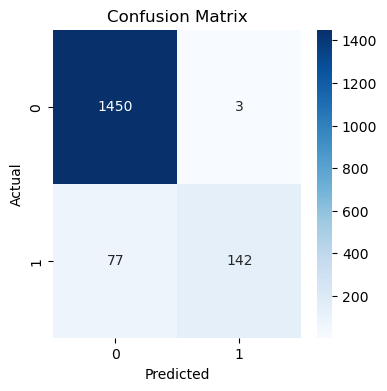

In [16]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

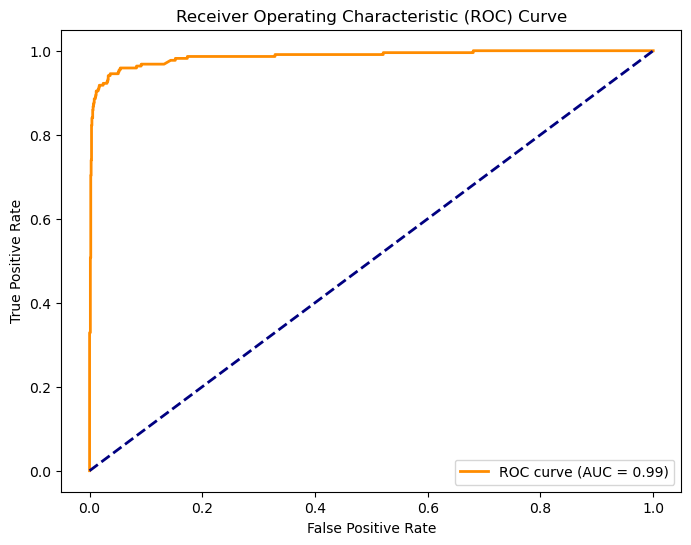

In [17]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(x_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

An AUC of 0.99, as shown, indicates that the model has excellent discrimination capability between the classes(ham and spam).

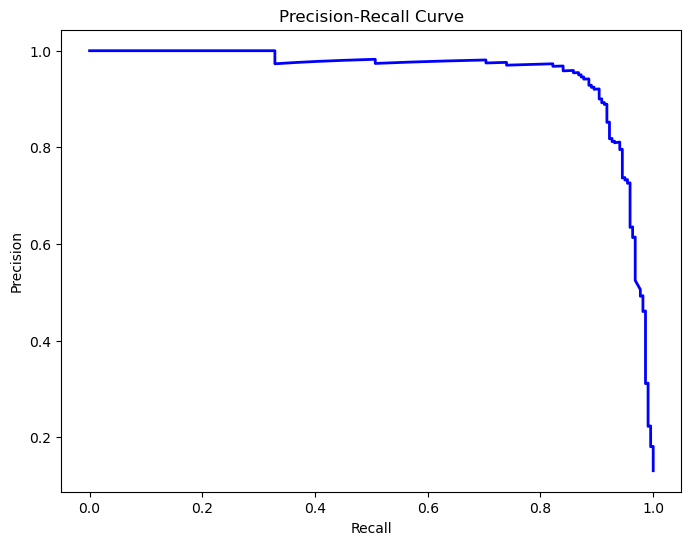

In [18]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, classifier.predict_proba(x_test_tfidf)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

The curve above shows that the model maintains high precision even as recall increases, indicating that the model is effective at distinguishing the spam messages (class1) from the ham messages (class0).